In [1]:
import pandas as pd
import numpy as np

loan_df = pd.read_csv('Data/Loan_Default.csv')
loan_df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [2]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
loan_df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

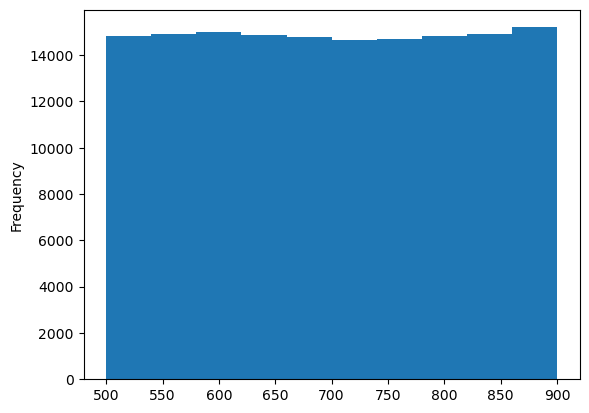

In [4]:
loan_df['Credit_Score'].plot.hist();

In [5]:
loan_df['Fake_Target'] = np.where(loan_df['Credit_Score'] < 580, 1, 0)
loan_df['Fake_Target'].value_counts()

# loan_df.drop('Fake_Target', axis=1)

Fake_Target
0    118933
1     29737
Name: count, dtype: int64

In [6]:
loan_df['loan_type'].value_counts()

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

In [7]:
loan_df['Fake_Target'] = (
    loan_df['loan_type'].map({
        "type1":0,
        "type2":1,
        "type3":1
    })
)

loan_df['Fake_Target'].value_counts()

Fake_Target
0    113173
1     35497
Name: count, dtype: int64

## Exploring the Target

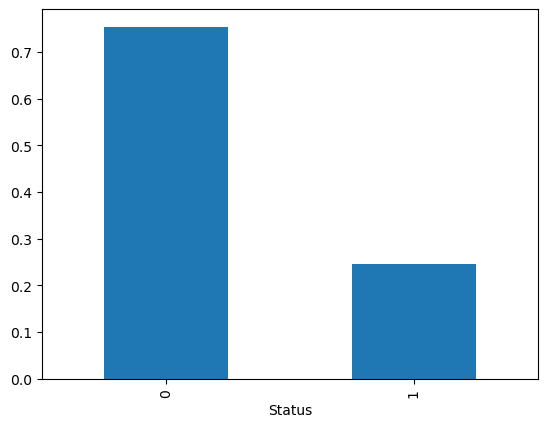

In [8]:
loan_df['Status'].value_counts(normalize=True).plot.bar();

## Exploring the Features

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

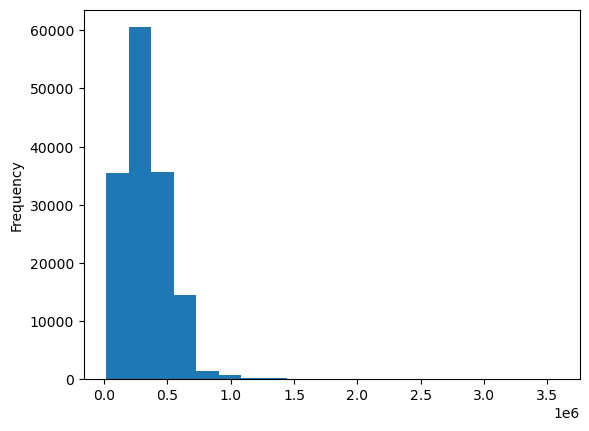

In [10]:
# numeric
loan_df['loan_amount'].plot.hist(bins=20);

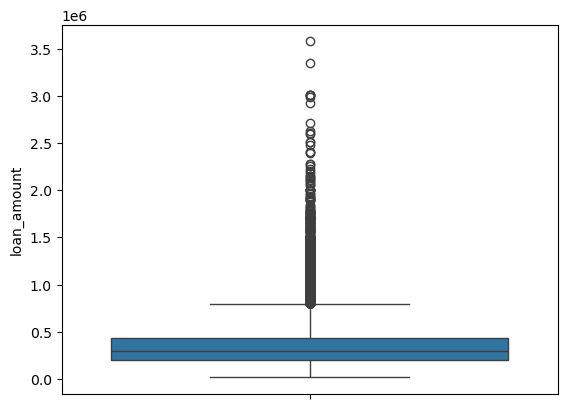

In [11]:
import seaborn as sns

sns.boxplot(loan_df['loan_amount']);

In [12]:
loan_df.select_dtypes('number').columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'Fake_Target'],
      dtype='object')

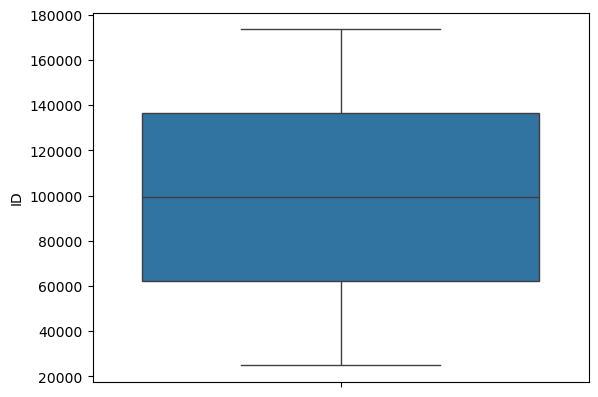

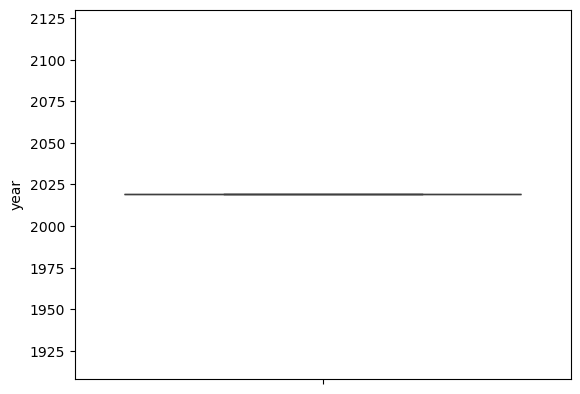

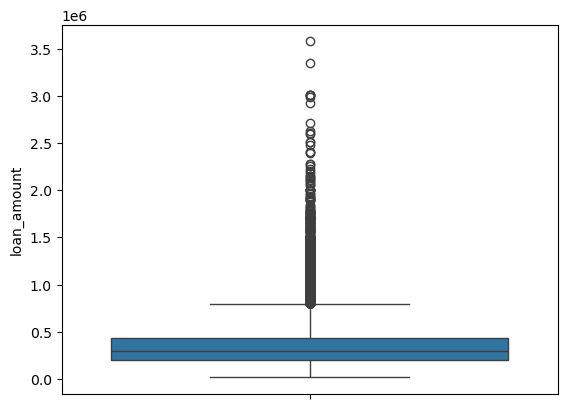

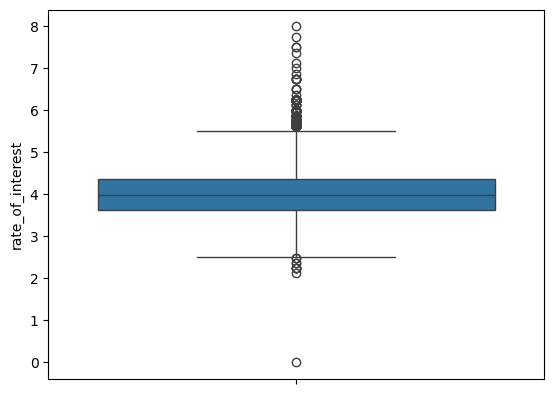

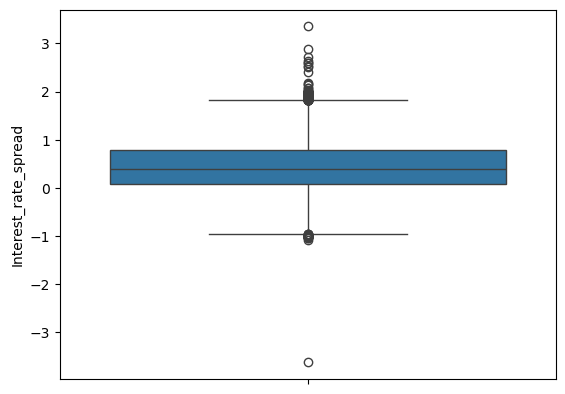

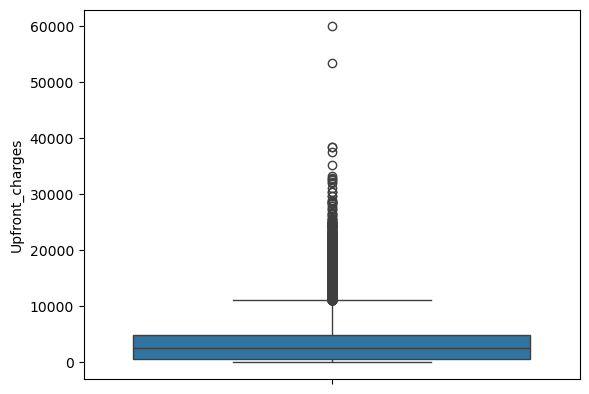

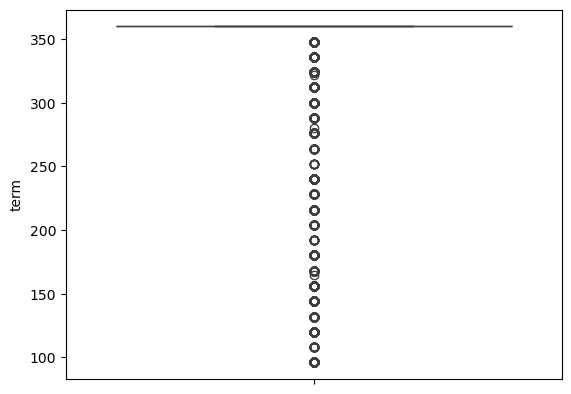

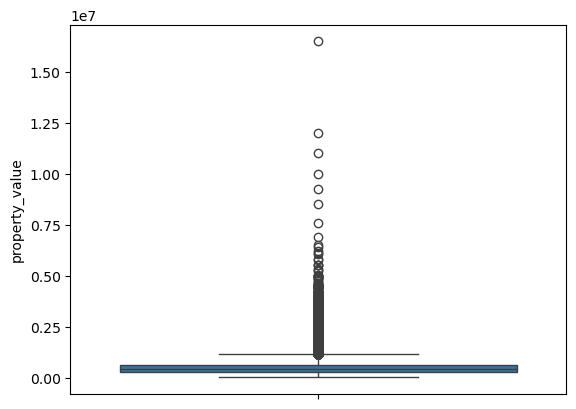

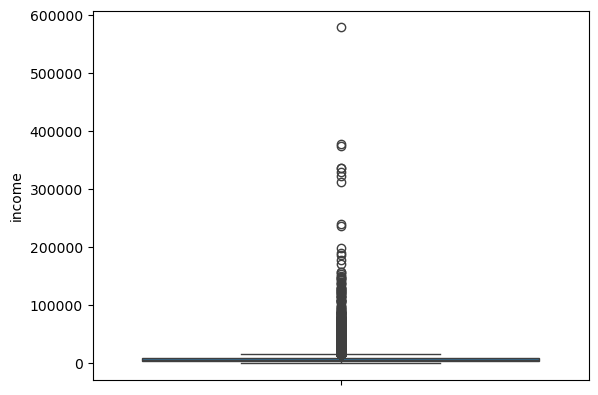

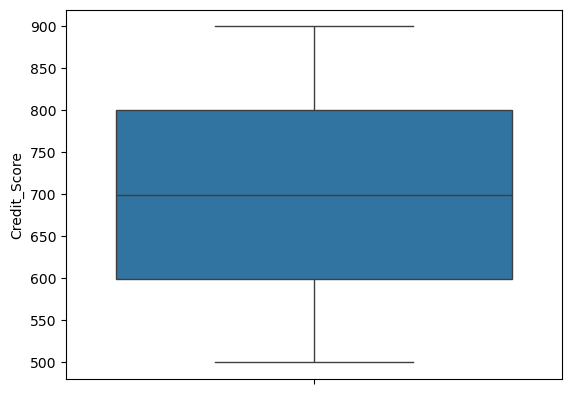

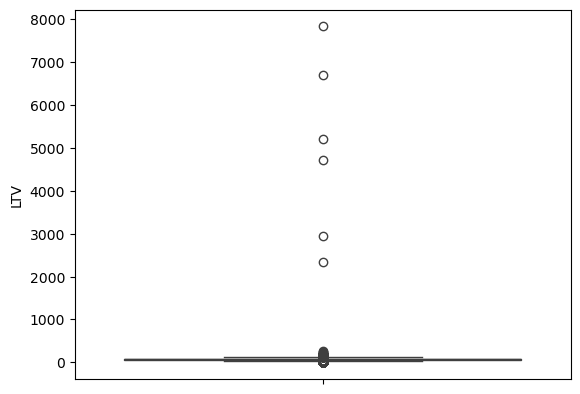

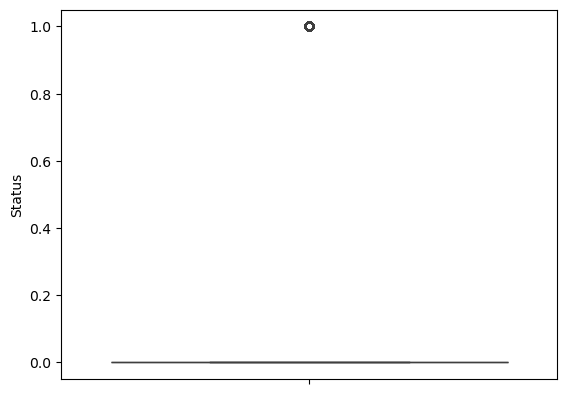

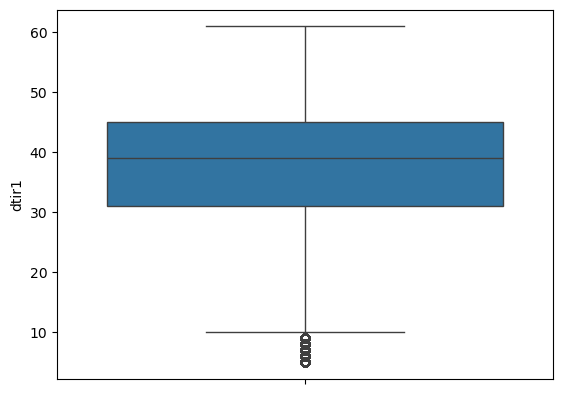

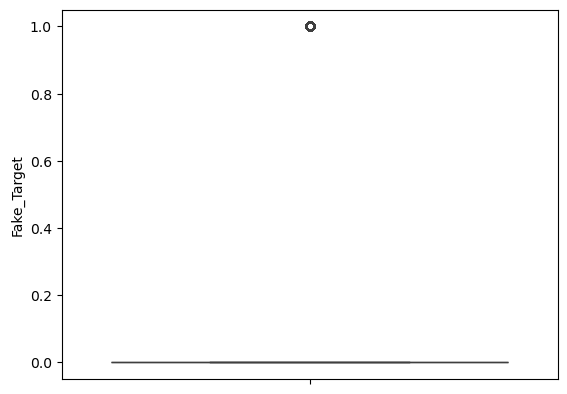

In [13]:
import matplotlib.pyplot as plt

for column in loan_df.select_dtypes('number').columns:
    sns.boxplot(loan_df[column]).set(ylabel=column)
    plt.show()

In [14]:
loan_df.select_dtypes('object').columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

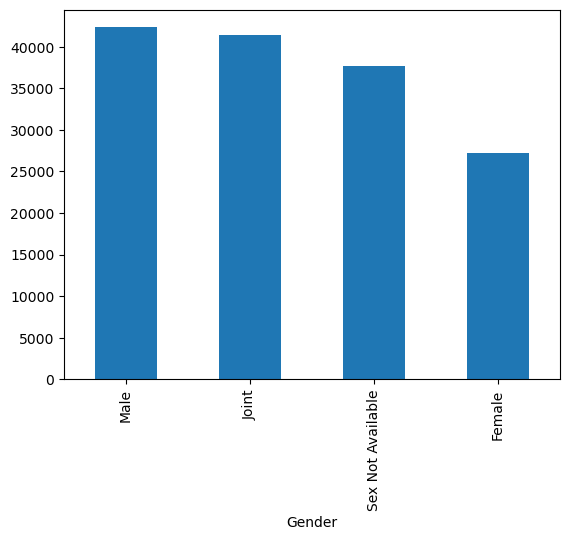

In [15]:
loan_df['Gender'].value_counts().plot.bar();

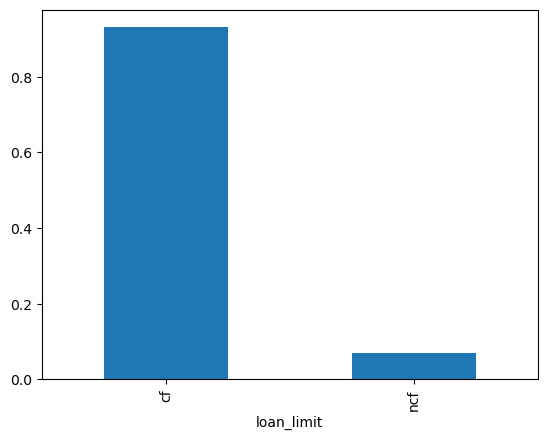

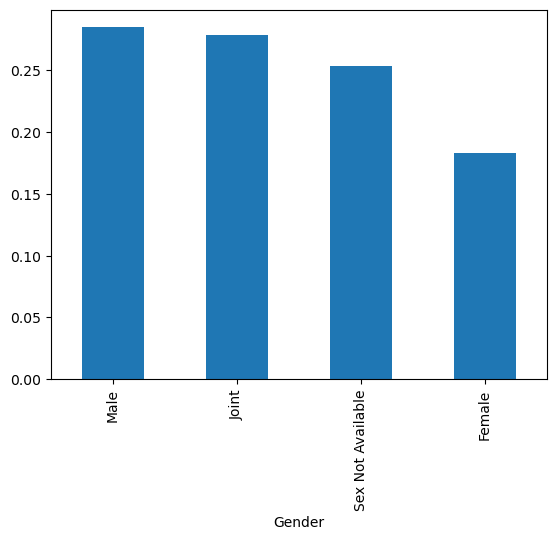

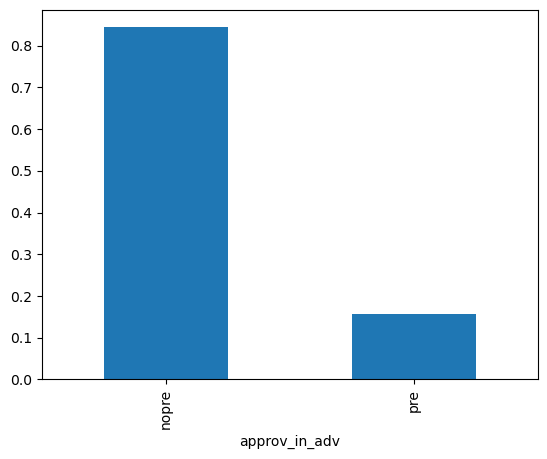

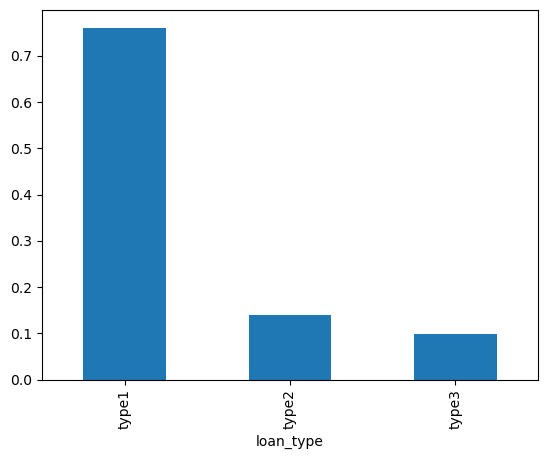

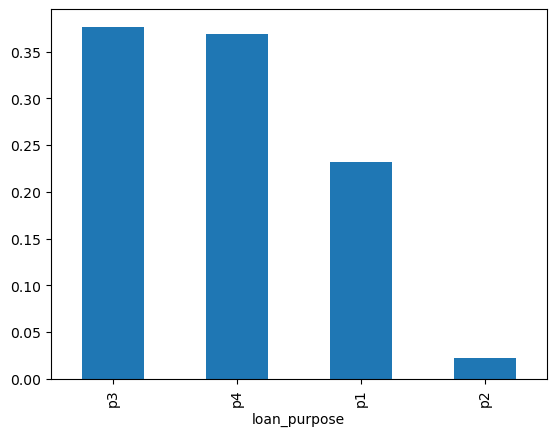

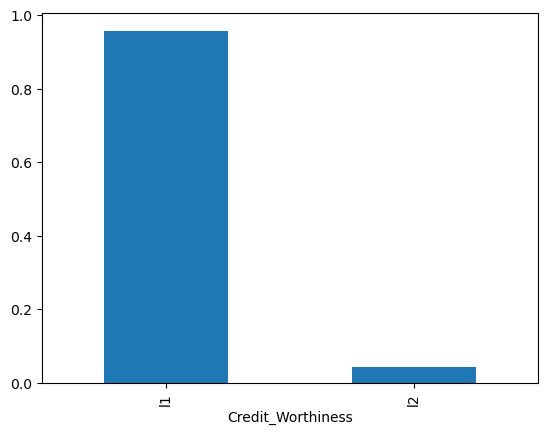

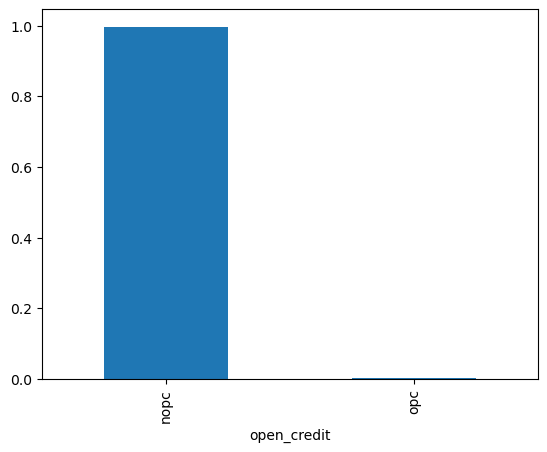

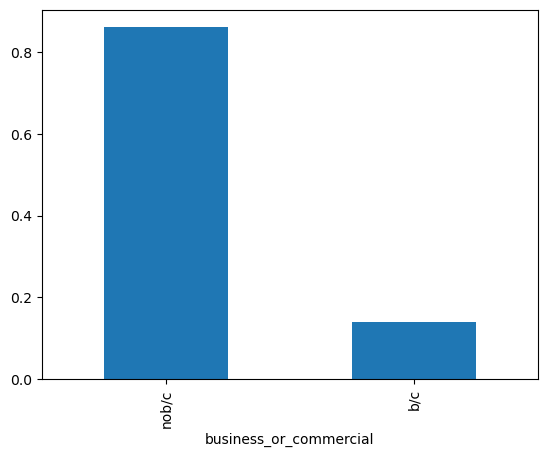

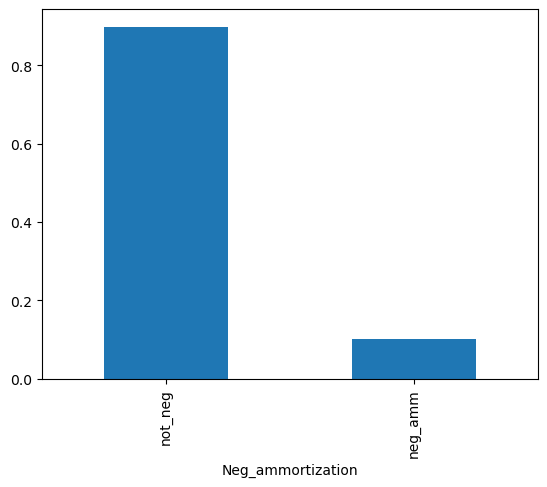

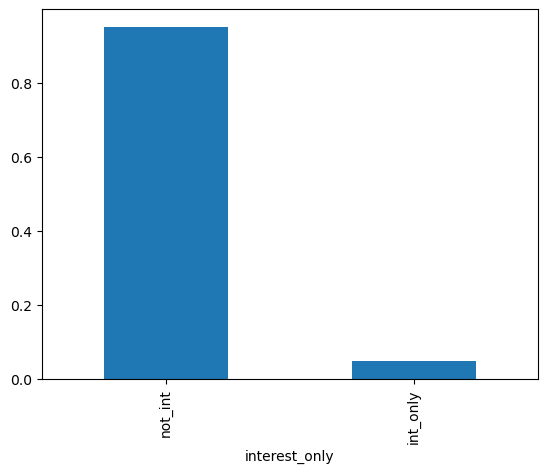

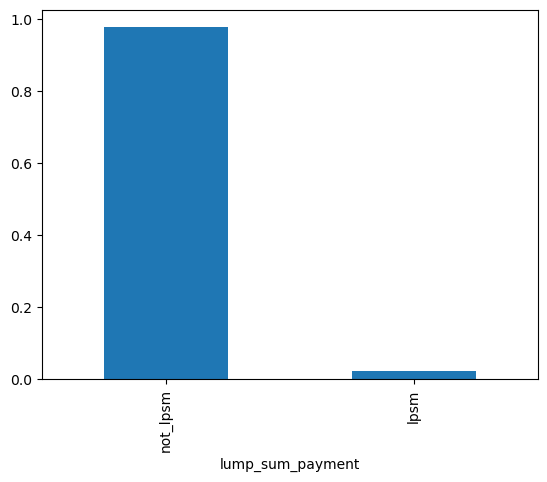

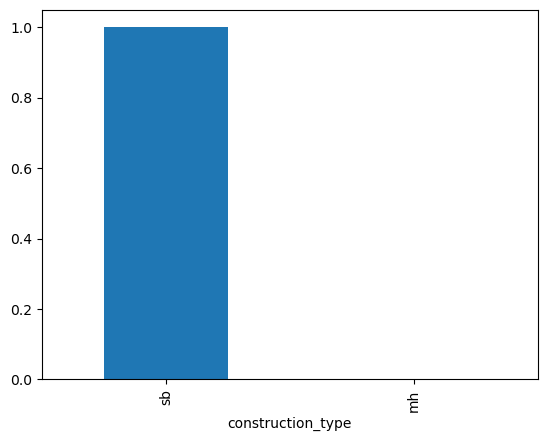

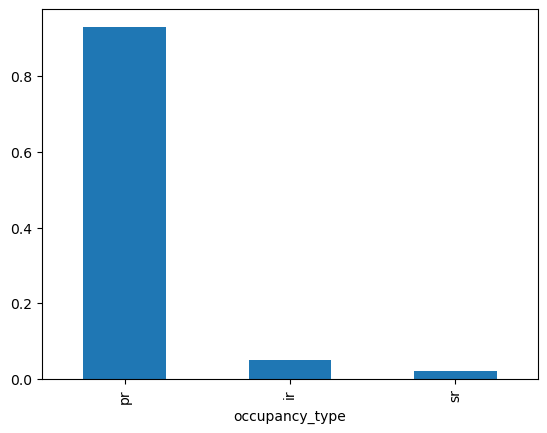

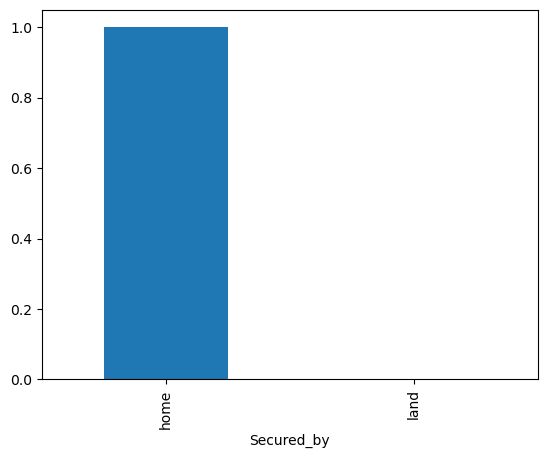

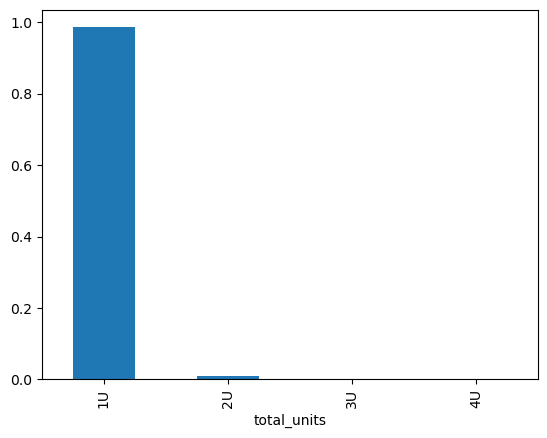

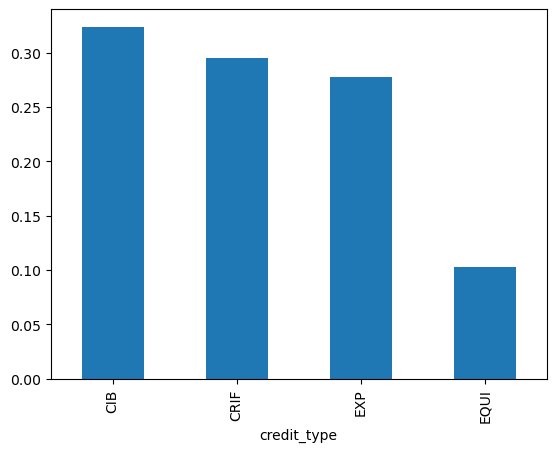

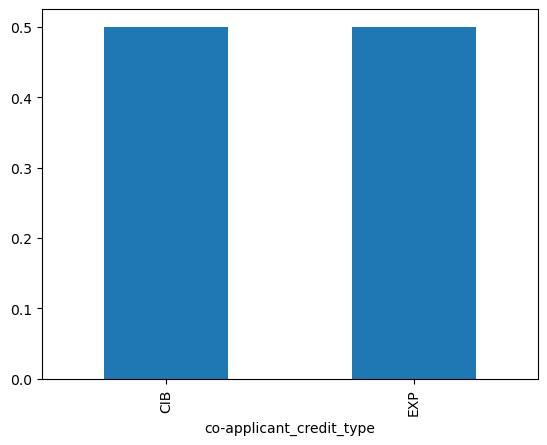

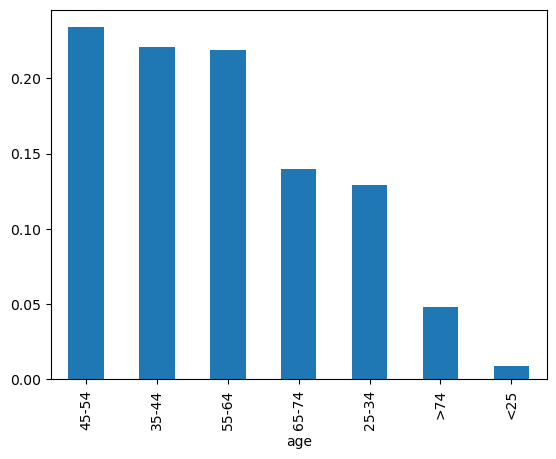

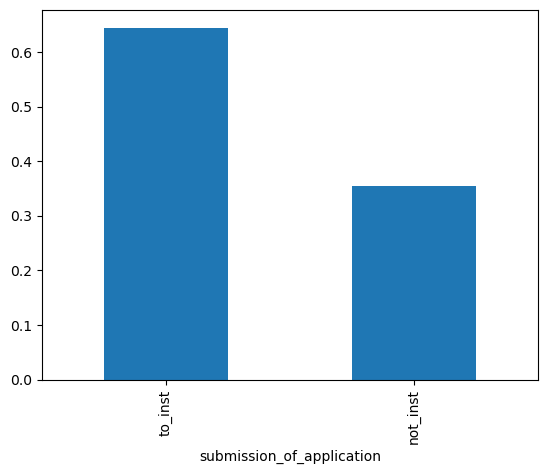

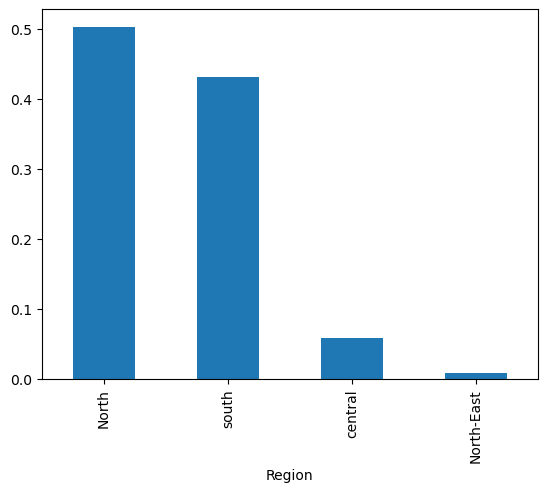

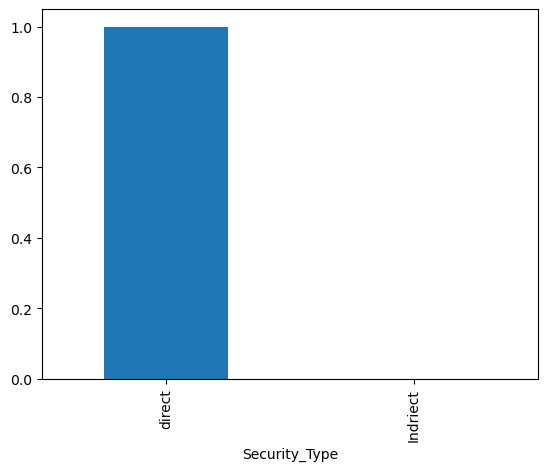

In [16]:
for column in loan_df.select_dtypes('object').columns:
    loan_df[column].value_counts(normalize=True).plot.bar()
    plt.show()

## Correlation

In [17]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

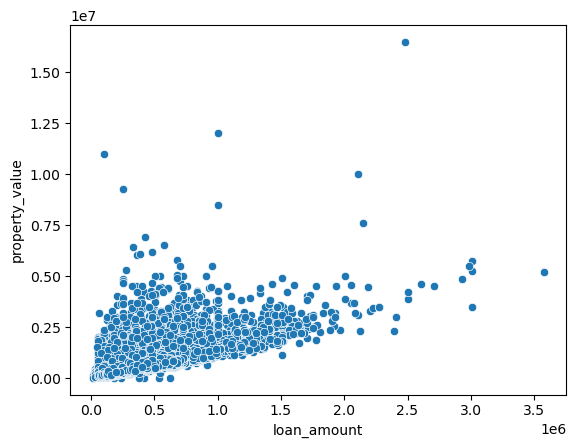

In [18]:
sns.scatterplot(loan_df, x='loan_amount', y='property_value'); 

In [19]:
loan_df['loan_amount'].corr(loan_df['property_value'])

0.7342490169595279

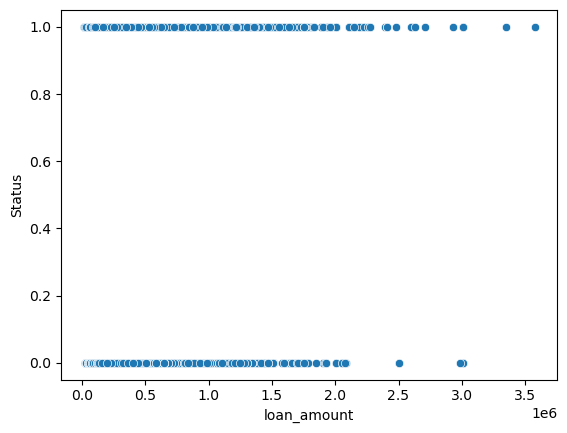

In [20]:
sns.scatterplot(loan_df, x='loan_amount', y='Status'); 

In [21]:
loan_df['loan_amount'].corr(loan_df['Status'])

-0.0368252755443805

In [22]:
loan_df.corr(numeric_only=True)

ID  year  loan_amount  rate_of_interest  \
ID                    1.000000   NaN    -0.000566          0.000442   
year                       NaN   NaN          NaN               NaN   
loan_amount          -0.000566   NaN     1.000000         -0.150844   
rate_of_interest      0.000442   NaN    -0.150844          1.000000   
Interest_rate_spread  0.002338   NaN    -0.377272          0.614908   
Upfront_charges      -0.005507   NaN     0.065556         -0.076473   
term                 -0.004056   NaN     0.174474          0.209330   
property_value        0.000990   NaN     0.734249         -0.122613   
income                0.002535   NaN     0.456065         -0.041809   
Credit_Score         -0.001036   NaN     0.004438         -0.001331   
LTV                  -0.005853   NaN     0.038869         -0.000220   
Status                0.001703   NaN    -0.036825          0.022957   
dtir1                -0.008132   NaN     0.015029          0.055124   
Fake_Target           0.000668   NaN    -0.121063         -0.227722   

                      Interest_rate_spread  Upfront_charges      term  \
ID                                0.002338        -0.005507 -0.004056   
year                                   NaN              NaN       NaN   
loan_amount                      -0.377272         0.065556  0.174474   
rate_of_interest                  0.614908        -0.076473  0.209330   
Interest_rate_spread              1.000000         0.033037 -0.157139   
Upfront_charges                   0.033037         1.000000 -0.054960   
term                             -0.157139        -0.054960  1.000000   
property_value                   -0.334571         0.053043  0.045117   
income                           -0.151333         0.016580 -0.053785   
Credit_Score                     -0.001738        -0.001484 -0.003149   
LTV                               0.040257        -0.031347  0.106834   
Status                                 NaN        -0.019138 -0.000240   
dtir1                             0.078178         0.000115  0.110572   
Fake_Target                       0.063956        -0.157283  0.134627   

                      property_value    income  Credit_Score       LTV  \
ID                          0.000990  0.002535     -0.001036 -0.005853   
year                             NaN       NaN           NaN       NaN   
loan_amount                 0.734249  0.456065      0.004438  0.038869   
rate_of_interest           -0.122613 -0.041809     -0.001331 -0.000220   
Interest_rate_spread       -0.334571 -0.151333     -0.001738  0.040257   
Upfront_charges             0.053043  0.016580     -0.001484 -0.031347   
term                        0.045117 -0.053785     -0.003149  0.106834   
property_value              1.000000  0.414883      0.002430 -0.215102   
income                      0.414883  1.000000      0.000802 -0.066203   
Credit_Score                0.002430  0.000802      1.000000 -0.005533   
LTV                        -0.215102 -0.066203     -0.005533  1.000000   
Status                     -0.048864 -0.065119      0.004004  0.038895   
dtir1                      -0.056288 -0.267807     -0.000313  0.156557   
Fake_Target                -0.231537 -0.165025     -0.003620  0.187280   

                        Status     dtir1  Fake_Target  
ID                    0.001703 -0.008132     0.000668  
year                       NaN       NaN          NaN  
loan_amount          -0.036825  0.015029    -0.121063  
rate_of_interest      0.022957  0.055124    -0.227722  
Interest_rate_spread       NaN  0.078178     0.063956  
Upfront_charges      -0.019138  0.000115    -0.157283  
term                 -0.000240  0.110572     0.134627  
property_value       -0.048864 -0.056288    -0.231537  
income               -0.065119 -0.267807    -0.165025  
Credit_Score          0.004004 -0.000313    -0.003620  
LTV                   0.038895  0.156557     0.187280  
Status                1.000000  0.078083     0.077467  
dtir1                 0.078

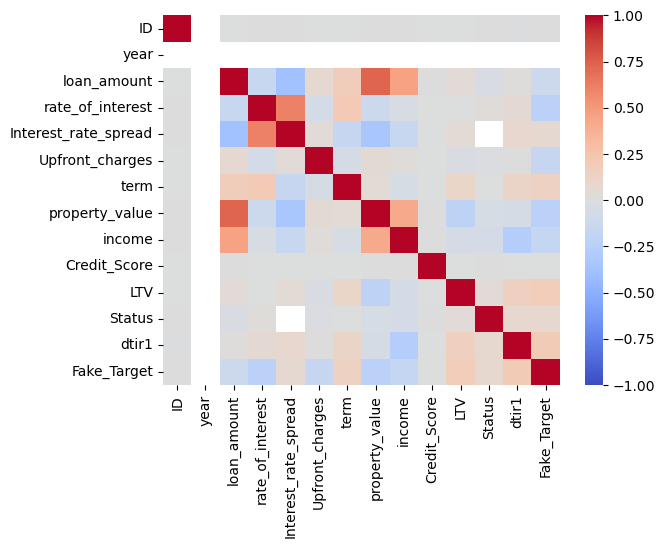

In [23]:
sns.heatmap(
    loan_df.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    cmap='coolwarm'
);

## Feature - Target Relationships

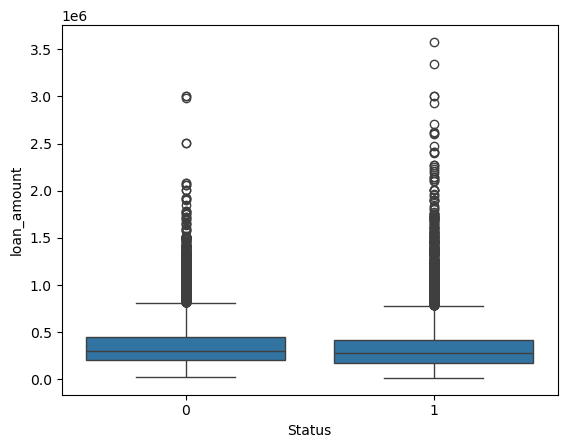

In [24]:
sns.boxplot(loan_df, x='Status', y='loan_amount');

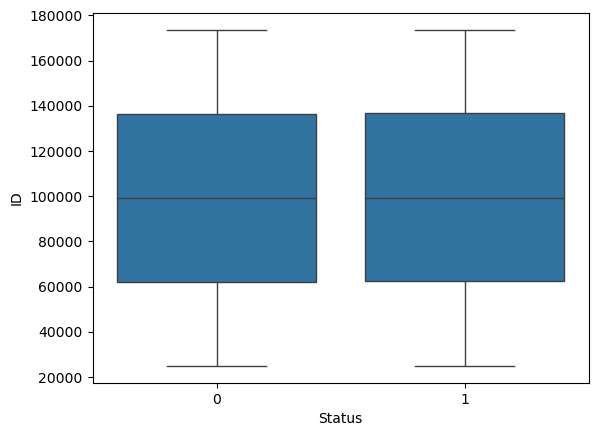

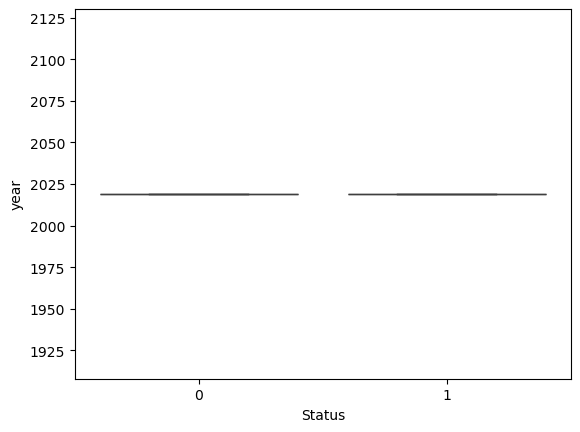

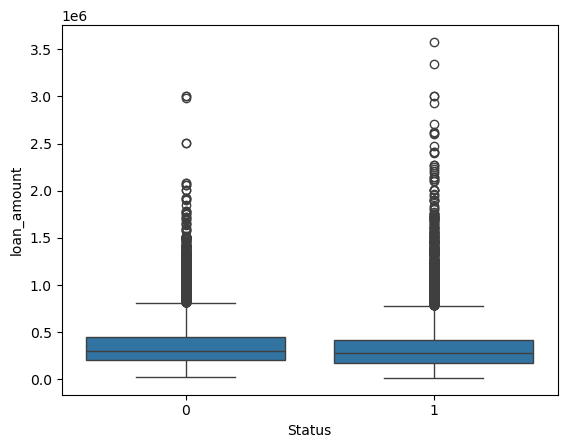

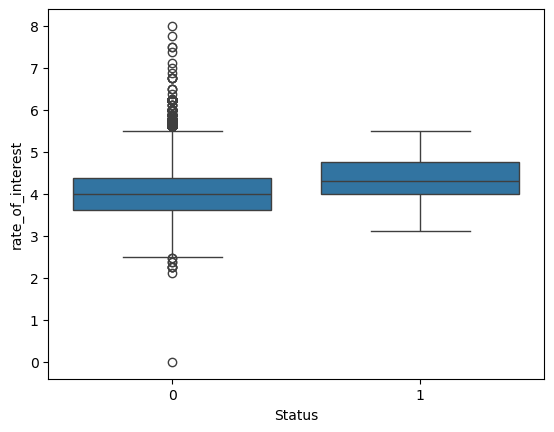

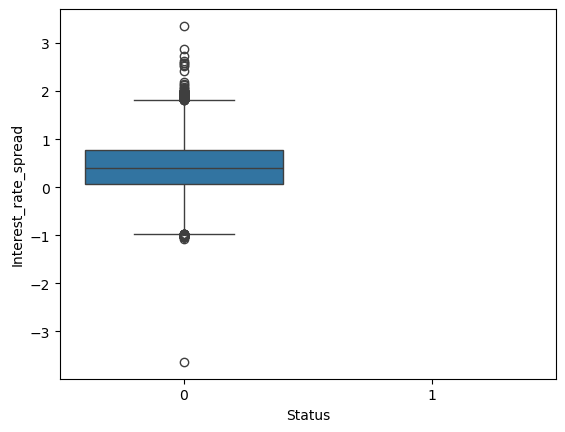

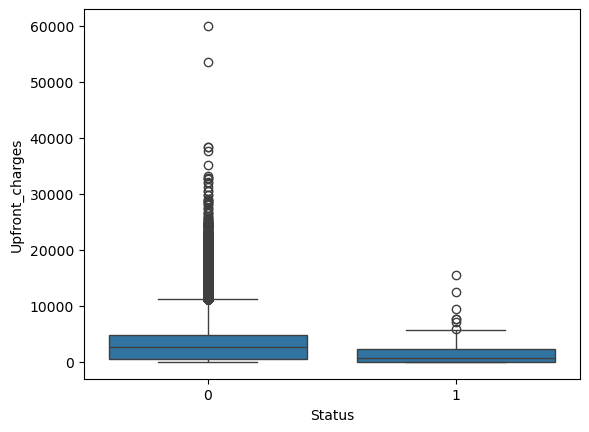

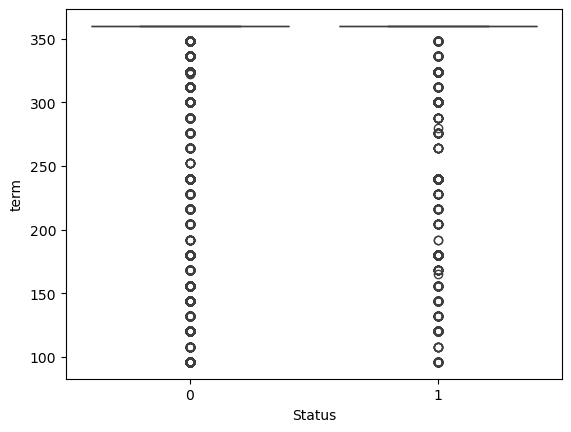

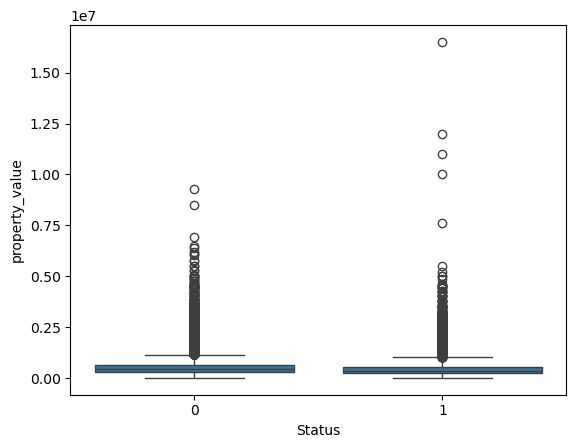

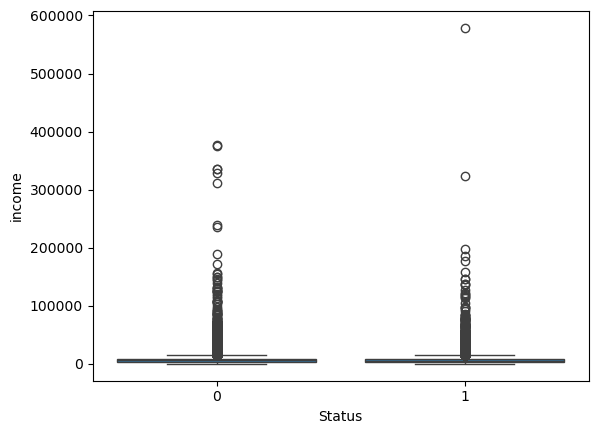

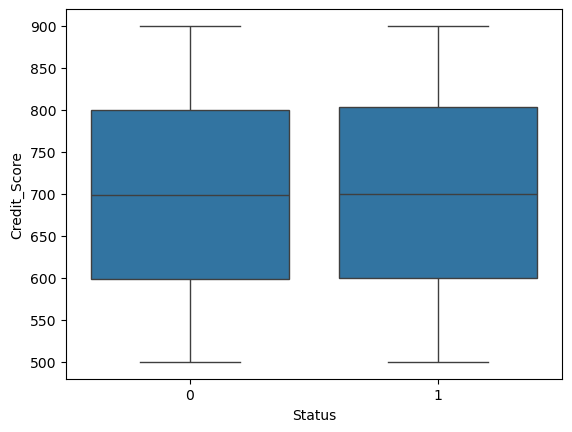

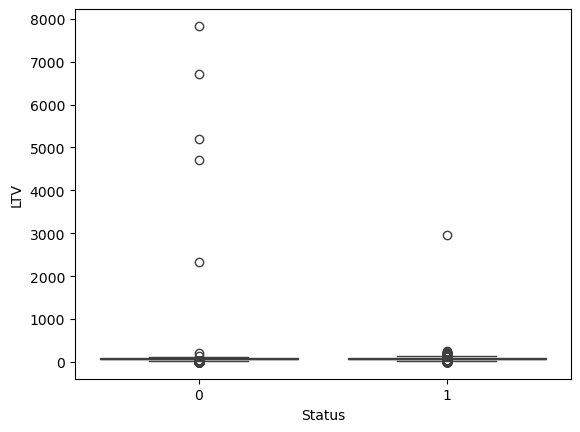

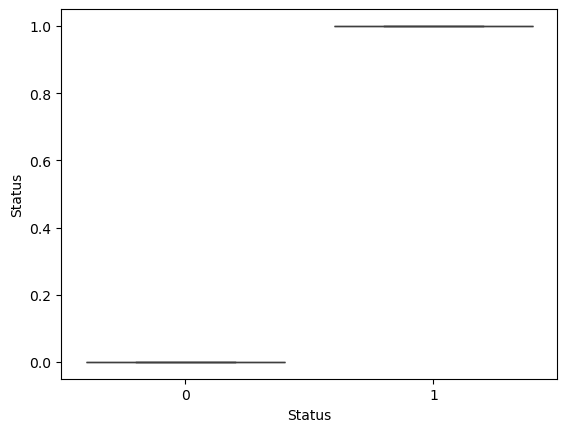

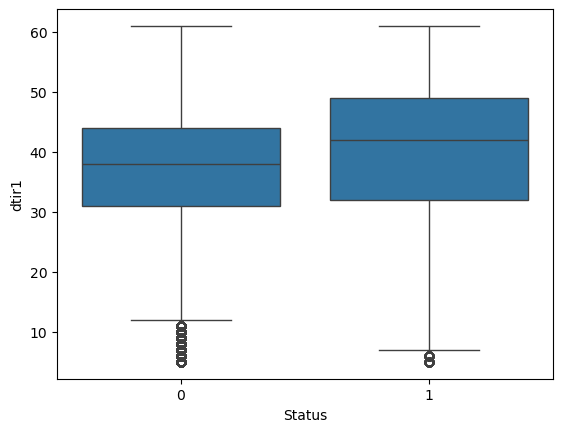

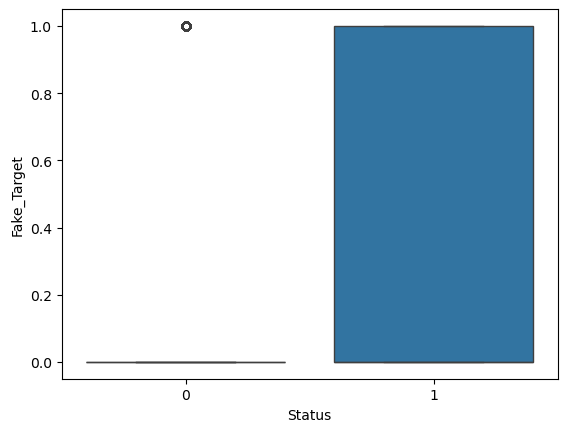

In [25]:
def num_box_plotter(data, target):
    for col in data.select_dtypes('number'):
        sns.boxplot(data=data, x=target, y=col)
        plt.show()

num_box_plotter(loan_df, 'Status')

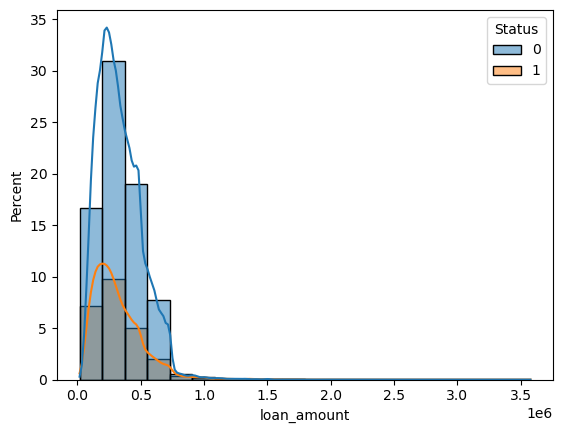

In [26]:
sns.histplot(loan_df, x='loan_amount', hue='Status', stat='percent', kde=True, bins=20);

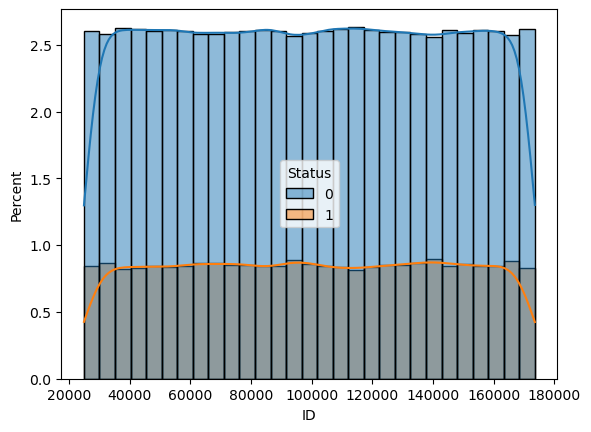

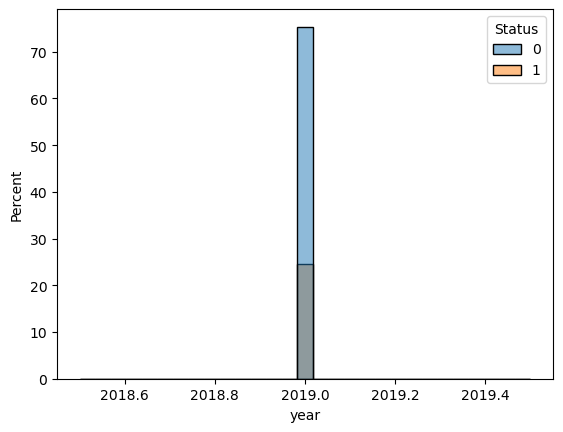

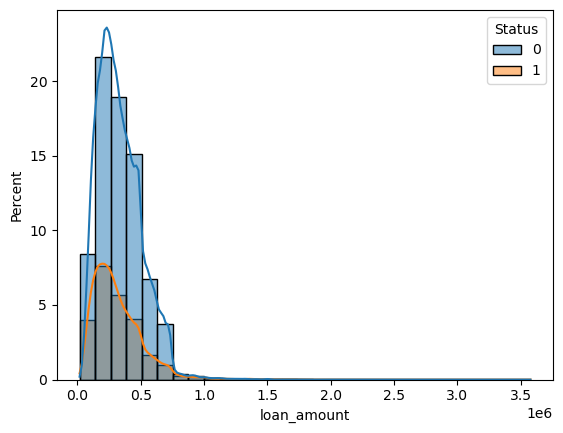

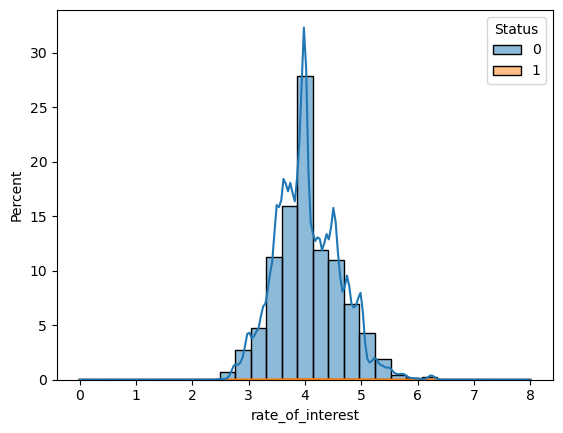

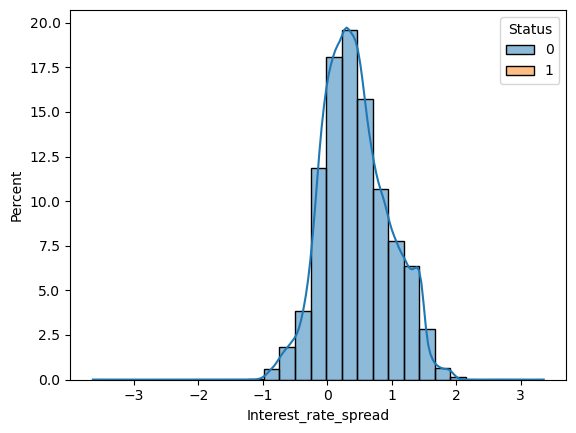

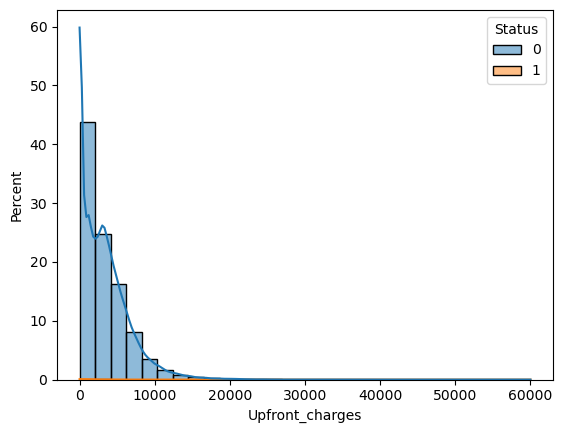

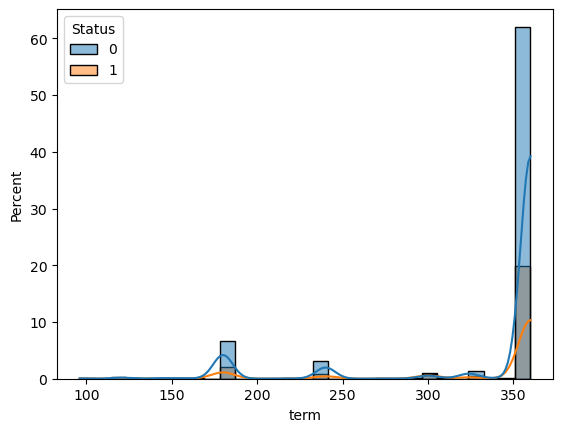

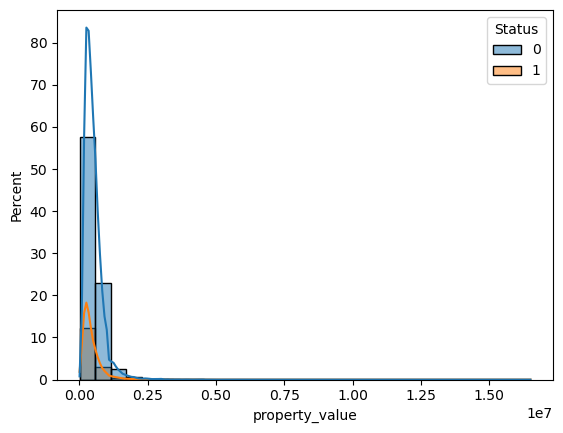

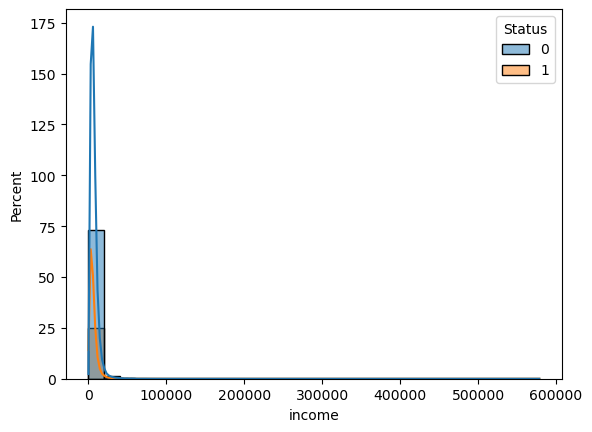

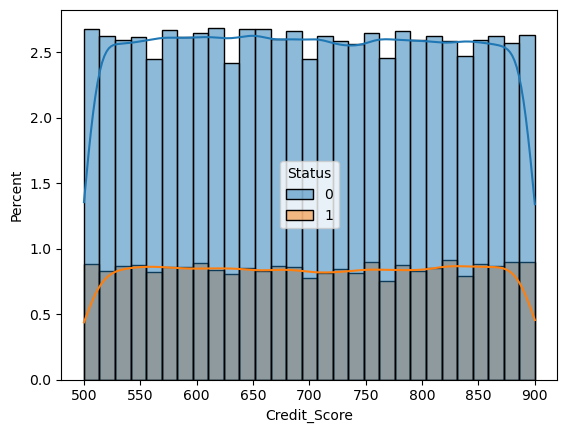

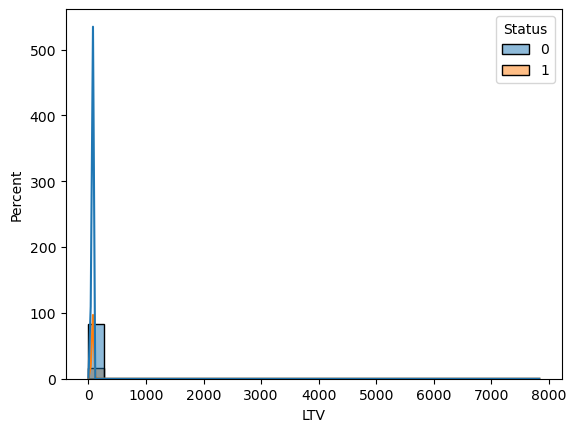

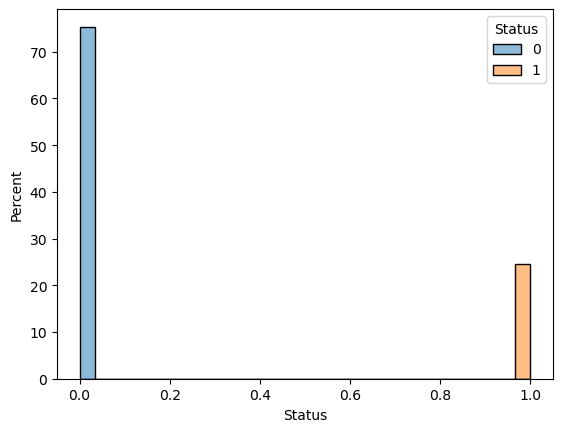

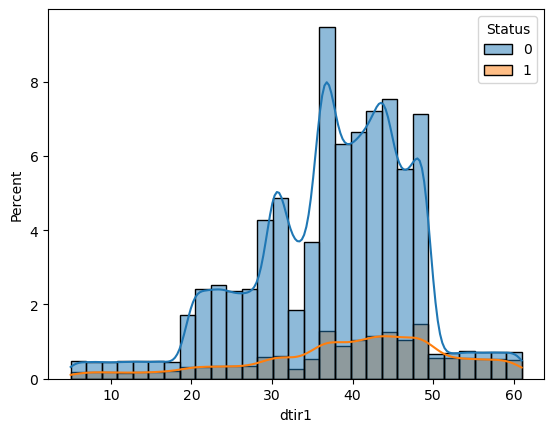

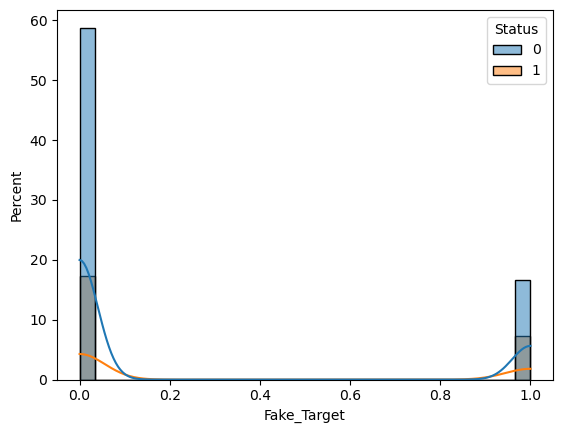

In [27]:
def hist_target_plotter(data, target):
    for col in data.select_dtypes('number'):
        sns.histplot(data=data, x=col, hue=target, stat='percent', kde=True, bins=29)
        plt.show()

hist_target_plotter(loan_df, 'Status')

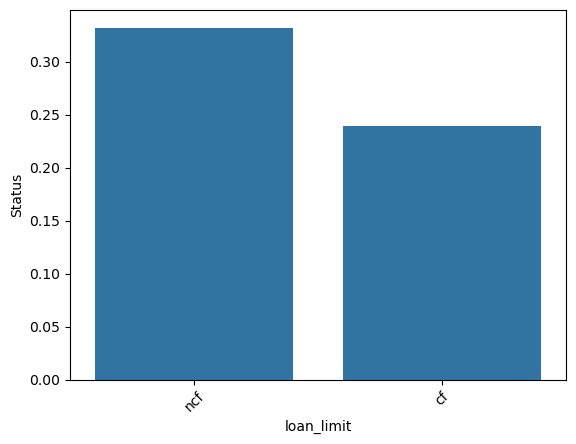

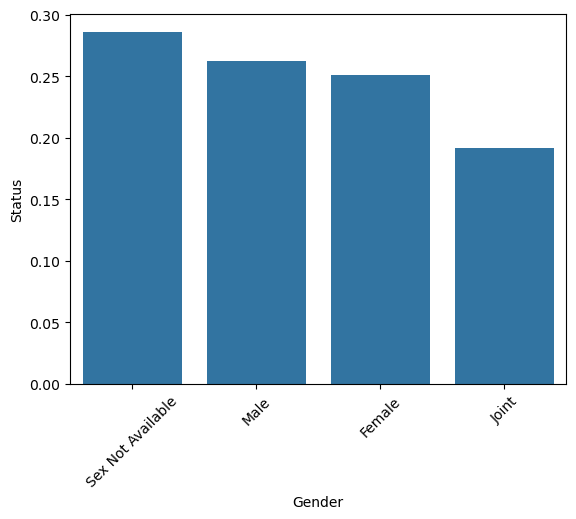

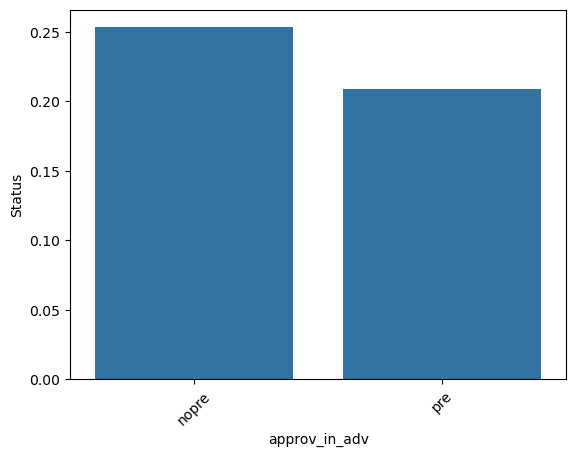

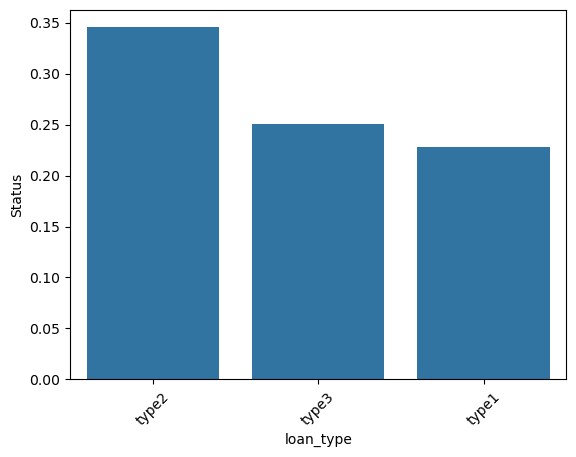

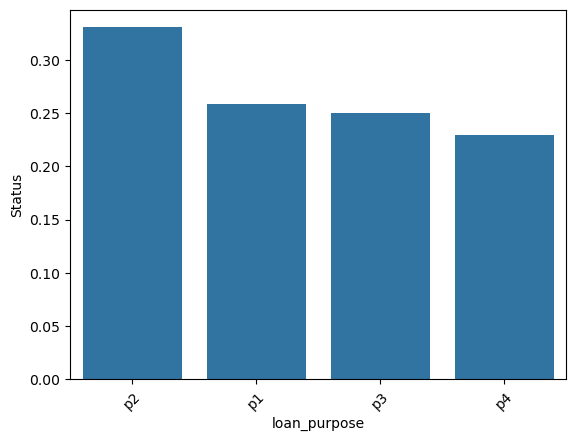

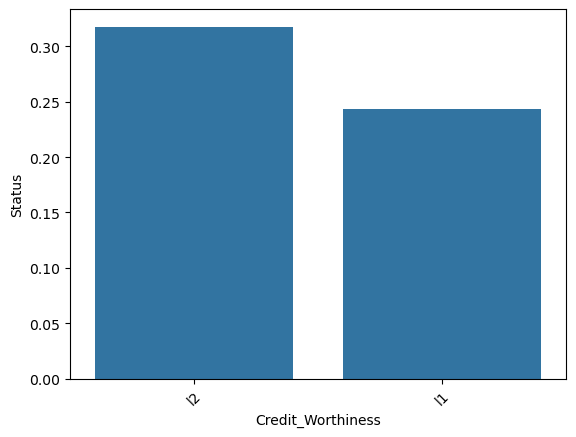

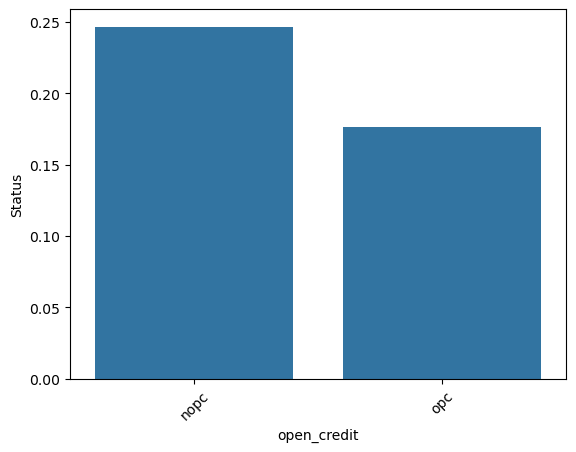

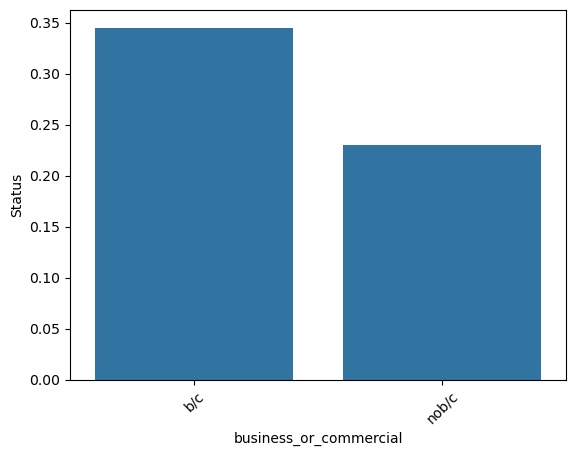

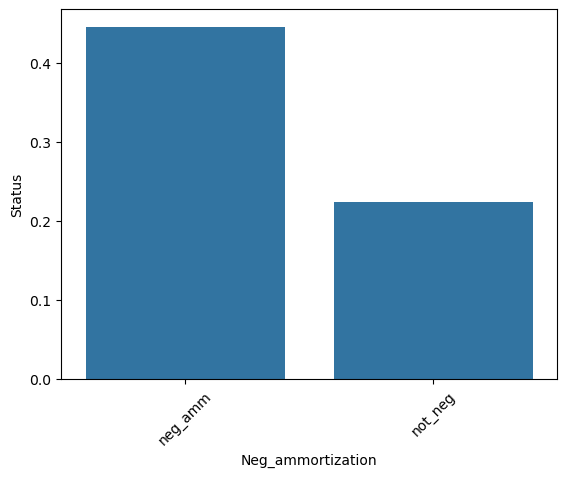

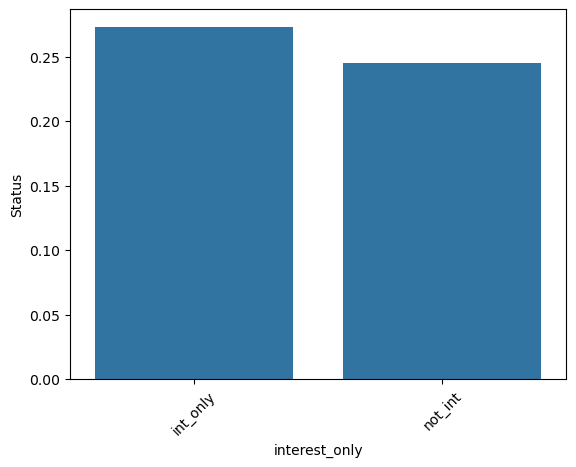

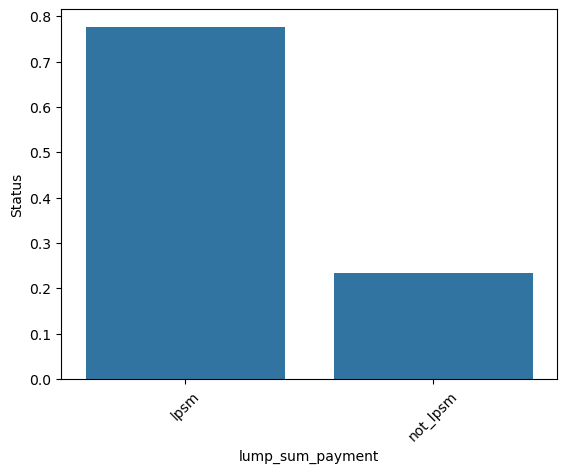

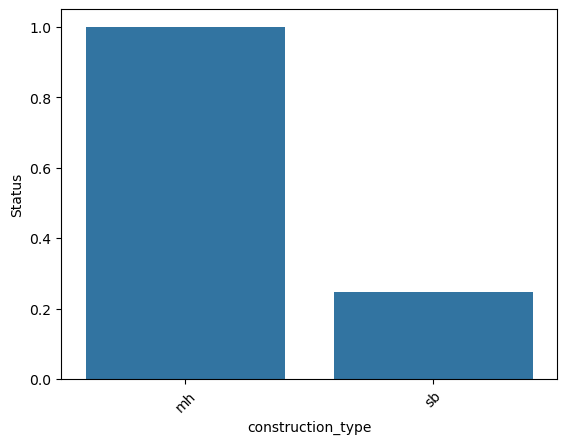

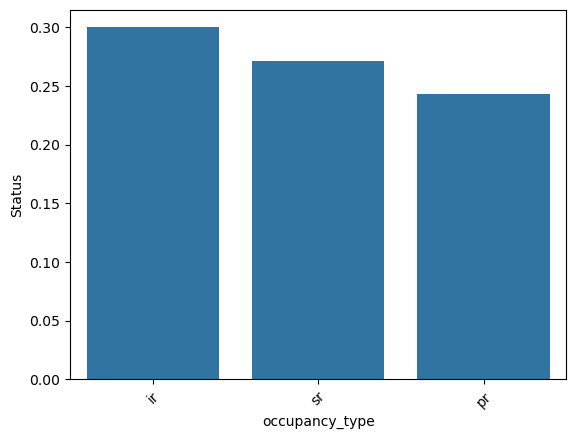

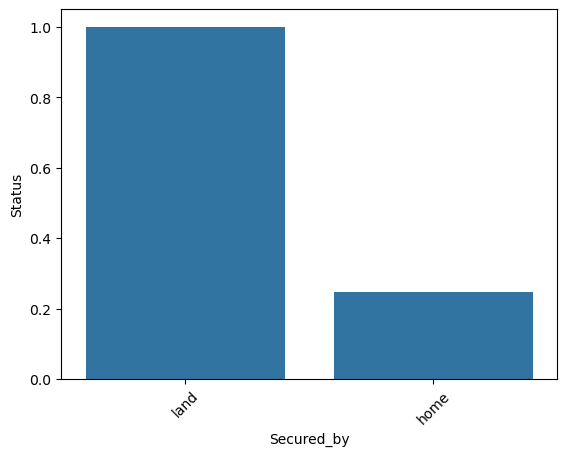

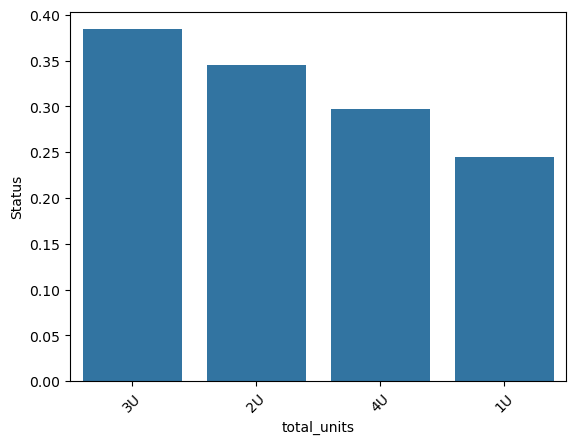

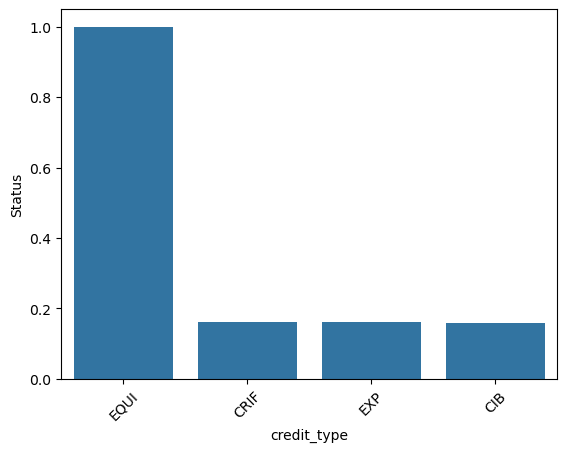

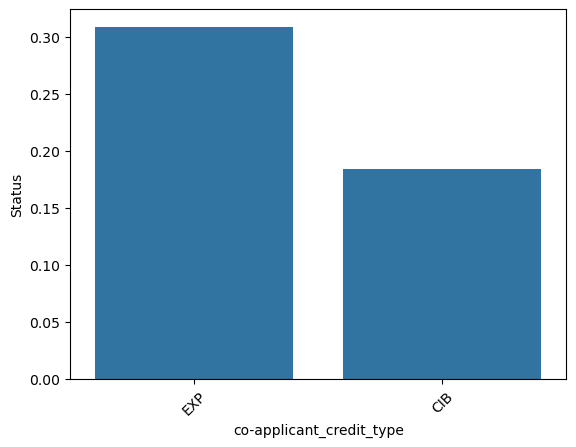

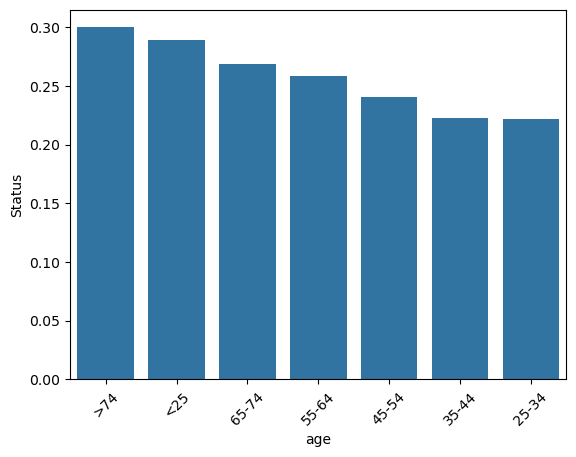

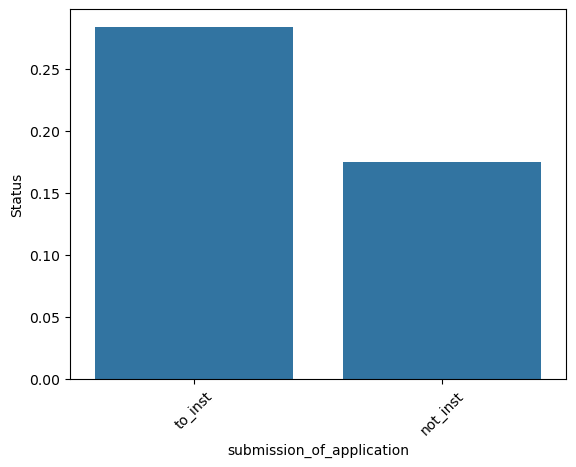

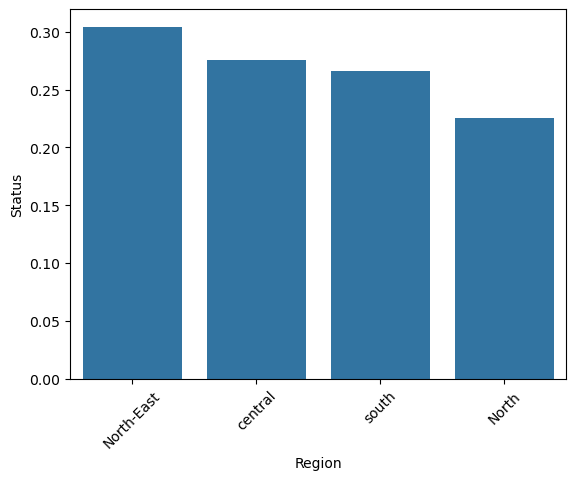

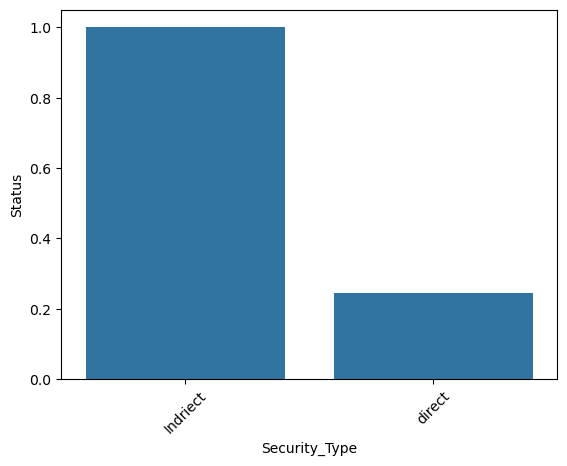

In [28]:
def cat_plotter(data, target):
    for col in data.select_dtypes(['object']).columns:
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({target: 'mean'})
                .sort_values(by=target, ascending=False)
            ),
            x=col,
            y=target
        )

        plt.xticks(rotation=45)
        plt.show()

cat_plotter(loan_df, 'Status')

## Pair Plots

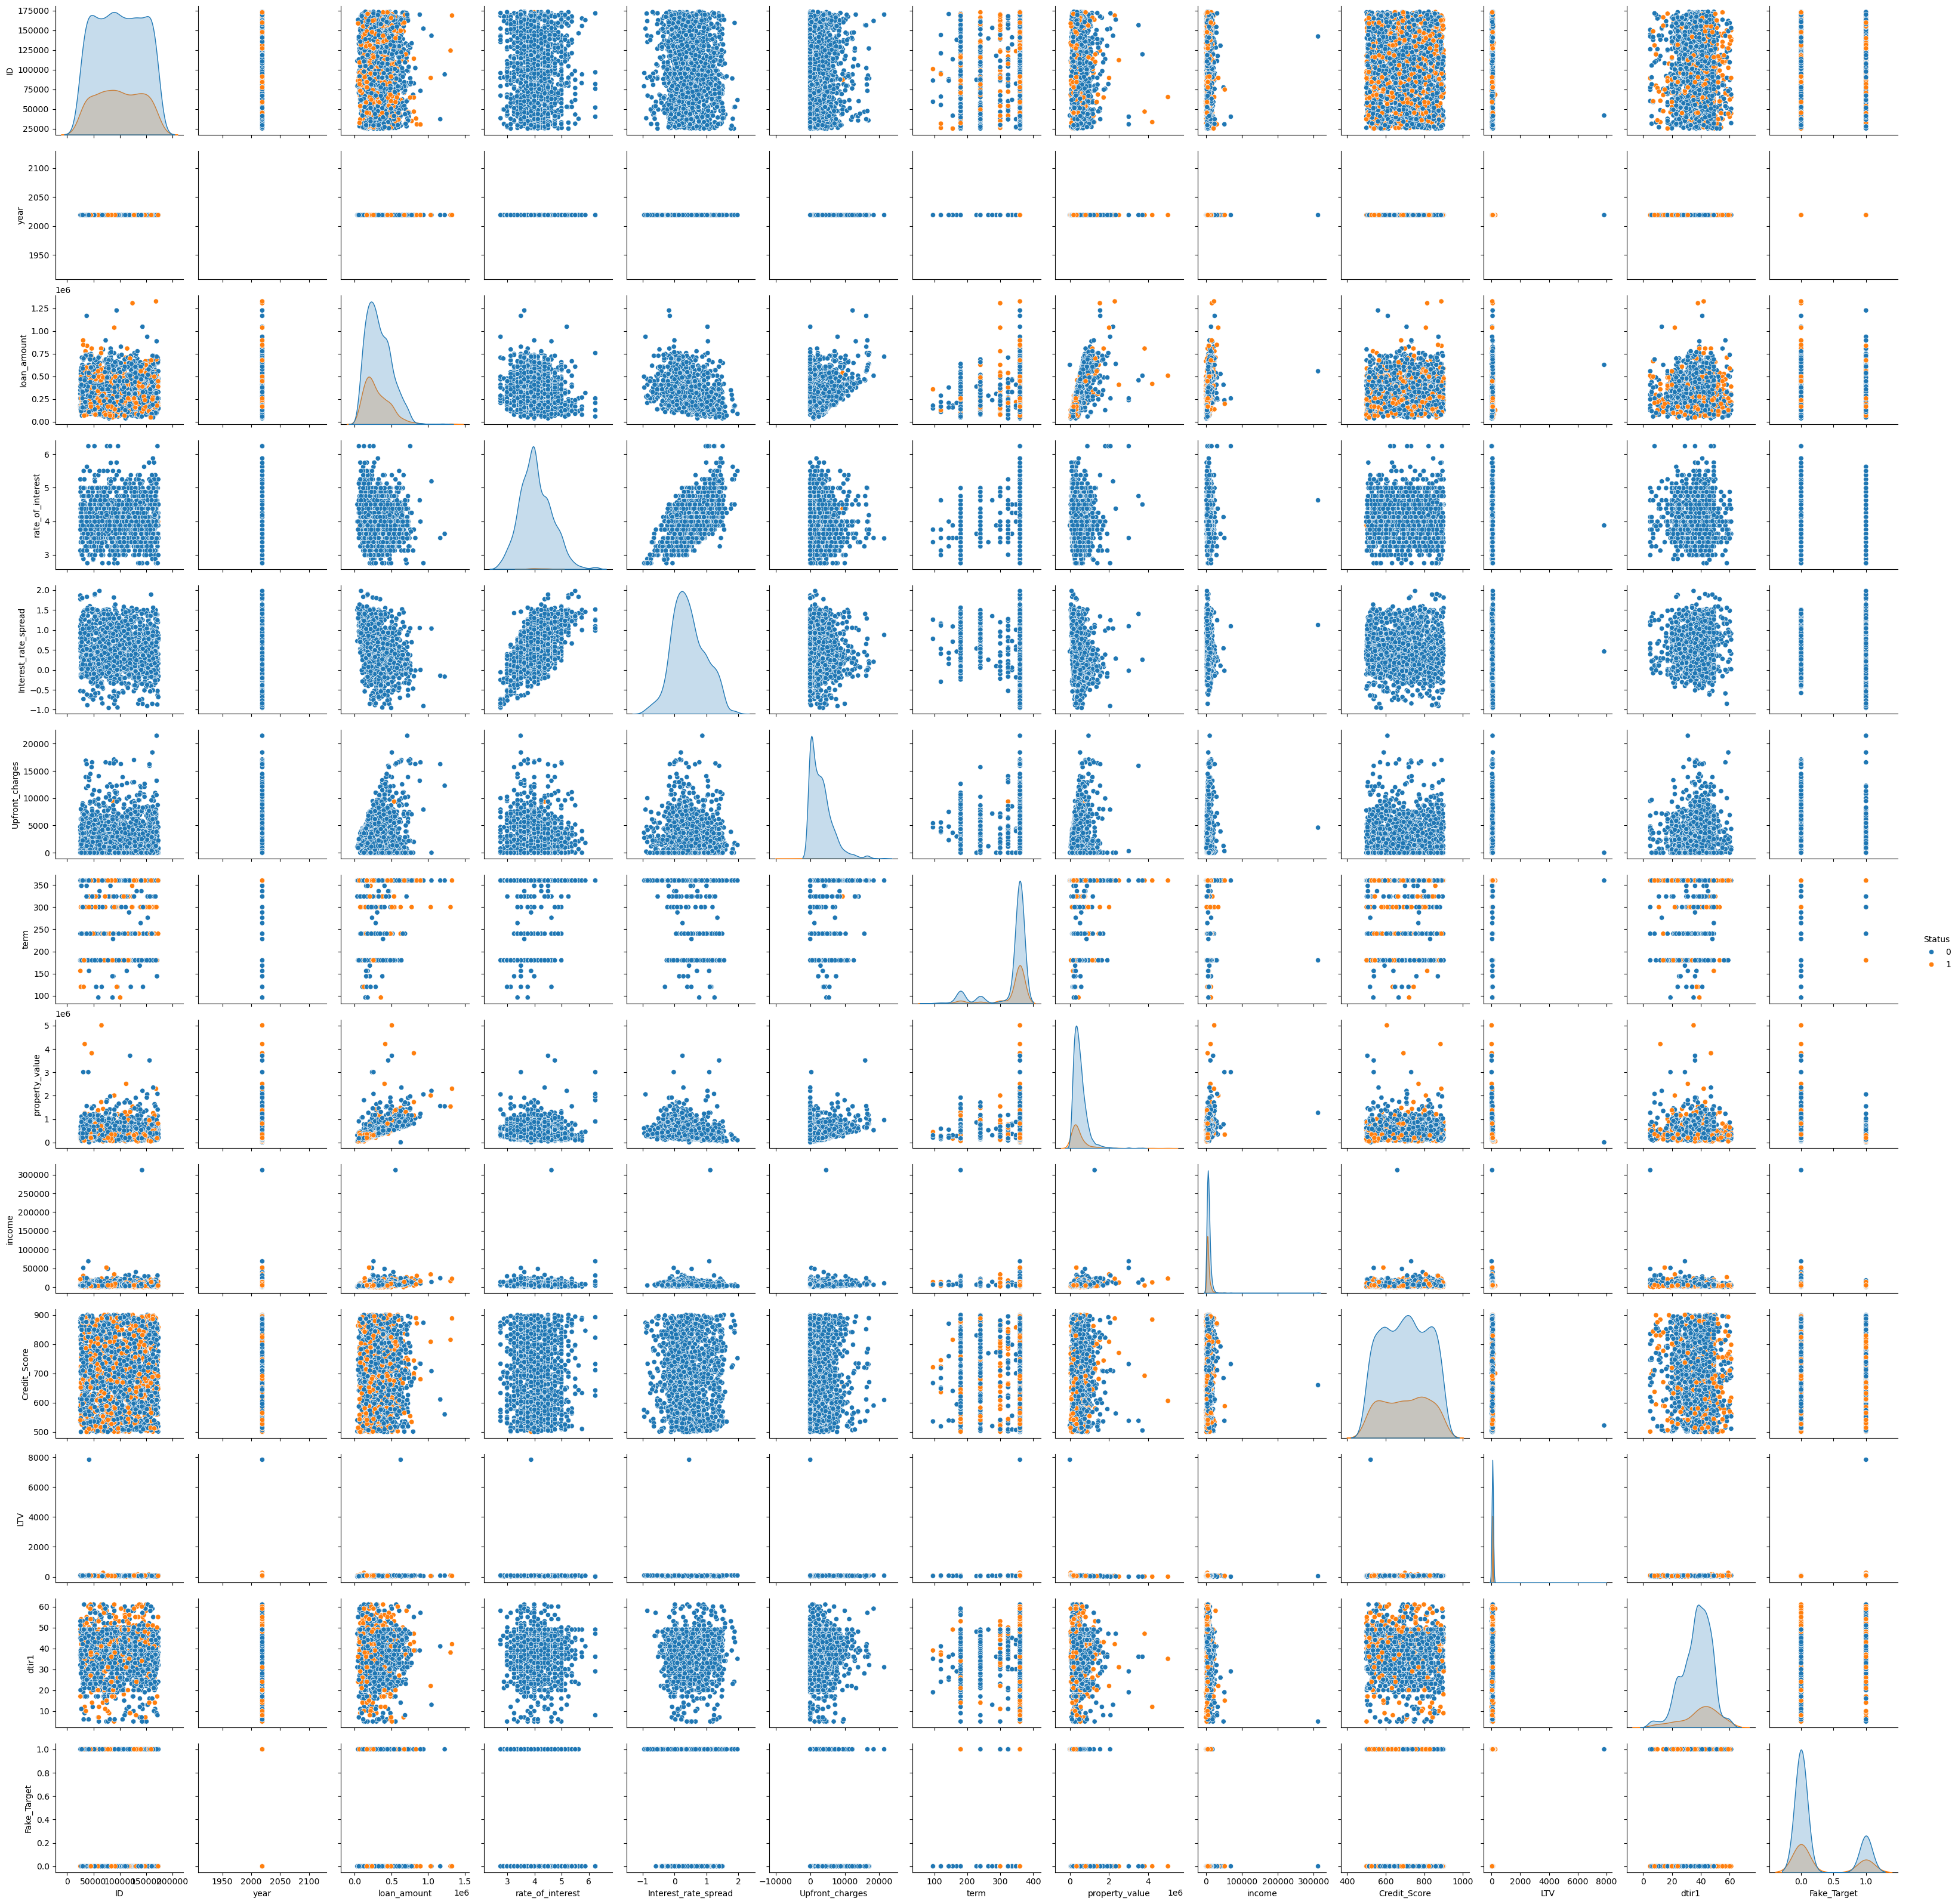

In [29]:
sns.pairplot(loan_df.sample(2000), hue='Status')

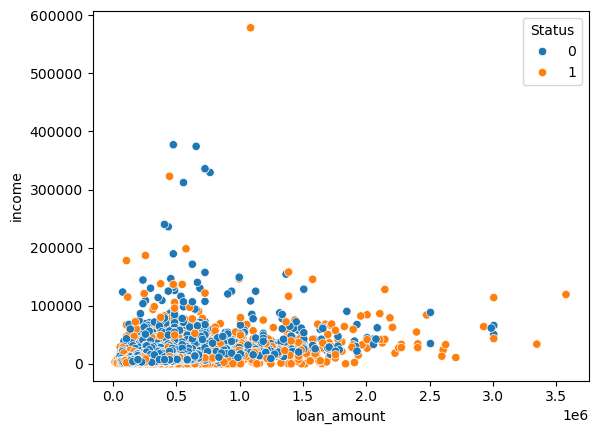

In [30]:
sns.scatterplot(loan_df, x='loan_amount', y='income', hue='Status');

## Feature Engineering

In [31]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [32]:
# Following operation: (A - B) / C
(
    (loan_df[['Credit_Score', 'loan_amount']] - 
    loan_df[['Credit_Score', 'loan_amount']].mean()) /
    loan_df[['Credit_Score', 'loan_amount']].std()
)

Credit_Score  loan_amount
0           0.502356    -1.166976
1          -1.275409    -0.677604
2           1.158230     0.409888
3          -0.973362     0.681761
4          -0.843913     1.986752
...              ...          ...
148665     -0.352007     0.573012
148666     -1.128700     1.388631
148667      0.019080     0.627387
148668      0.321127    -0.731979
148669      1.123710     0.409888

[148670 rows x 2 columns]

In [33]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit_transform(loan_df[['Credit_Score', 'loan_amount']])

array([[ 0.50235739, -1.16697989],
       [-1.27541323, -0.6776066 ],
       [ 1.15823392,  0.40988958],
       ...,
       [ 0.01907994,  0.62738881],
       [ 0.32112834, -0.73198141],
       [ 1.12371411,  0.40988958]])

In [34]:
loan_df['total_units'].value_counts()

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64

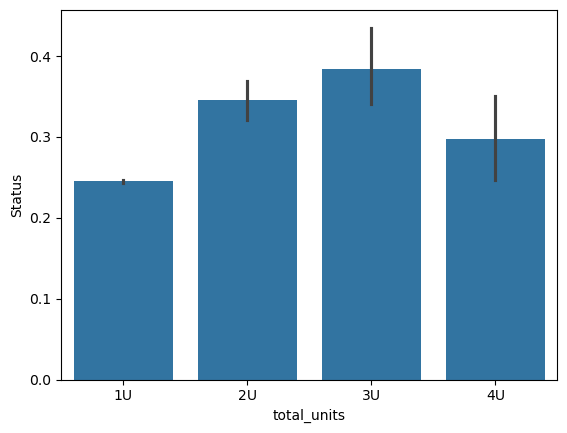

In [35]:
sns.barplot(loan_df, x='total_units', y='Status');

In [36]:
loan_df = loan_df.assign(
    total_units = loan_df['total_units'].map({
        '1U': '1U',
        '2U': '2U+',
        '3U': '2U+',
        '4U': '2U+'
    }),
    loan_amt_v_income = loan_df['loan_amount'] / loan_df['income']
)

loan_df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   co-applicant_credit_type    age  submission_of_application        LTV  \
0                       CIB  25-34                    to_inst  98.728814   
1                       EXP  55-64                    to_inst        NaN   
2                       CIB  35-44                    to_inst  80.019685   
3                       CIB  45-54                   not_inst  69.376900   
4                       EXP  25-34                   not_inst  91.886544   

   Region Security_Type Status dtir1  Fake_Target loan_amt_v_income  
0   south        direct      1  45.0            0         66.954023  
1   North        direct      1   NaN            1         41.465863  
2   south        direct      0  46.0            0         42.879747  
3   North        direct      0  42.0            0         38.425926  
4   North        direct      0  39.0            0         66.714559  

[5 rows x 36 columns]

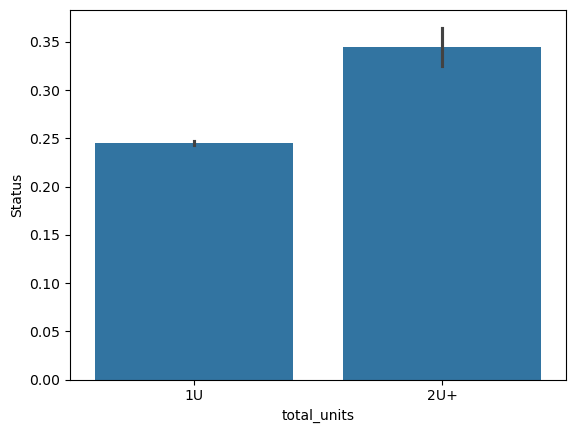

In [37]:
sns.barplot(loan_df, x='total_units', y='Status');

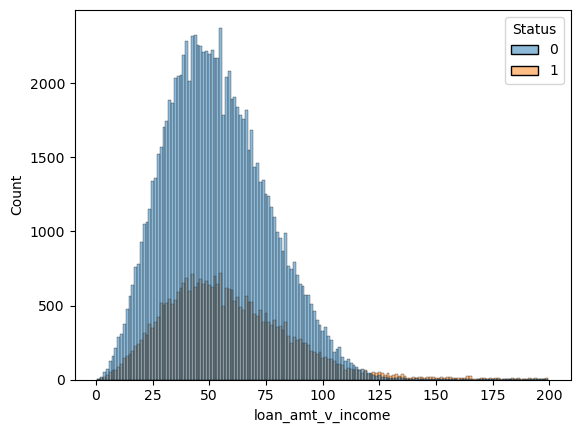

In [38]:
sns.histplot(
    loan_df.query('loan_amt_v_income < 200'),
    x='loan_amt_v_income',
    hue='Status'
);

In [39]:
orders = pd.DataFrame({
    "Customer_ID": [10001, 10001, 10002, 10002, 10003, 10004],
    "Order_Date": ["2023-01-25", "2023-06-13", "2023-02-02", "2023-02-02", "2023-05-15", "2023-02-17"],
    "Product_ID": ["GPQ-123", "QP3-111", "GPQ-123", "ACD-489", "GPQ-123", "QP3-123"],
    "Item_Price": [59.99, 79.99, 59.99, 19.99, 59.99, 79.99],
    "Quantity": [3, 5, 1, 2, 1, 4],
}).astype({"Order_Date": "datetime64[ns]"})

orders.head()

Customer_ID Order_Date Product_ID  Item_Price  Quantity
0        10001 2023-01-25    GPQ-123       59.99         3
1        10001 2023-06-13    QP3-111       79.99         5
2        10002 2023-02-02    GPQ-123       59.99         1
3        10002 2023-02-02    ACD-489       19.99         2
4        10003 2023-05-15    GPQ-123       59.99         1

In [40]:
orders = orders.assign(
    total_value = orders['Item_Price'] * orders['Quantity'],
    days_since_last_purchase = (pd.Timestamp.today() - orders['Order_Date']).dt.days,
)

orders.head()

Customer_ID Order_Date Product_ID  Item_Price  Quantity  total_value  \
0        10001 2023-01-25    GPQ-123       59.99         3       179.97   
1        10001 2023-06-13    QP3-111       79.99         5       399.95   
2        10002 2023-02-02    GPQ-123       59.99         1        59.99   
3        10002 2023-02-02    ACD-489       19.99         2        39.98   
4        10003 2023-05-15    GPQ-123       59.99         1        59.99   

   days_since_last_purchase  
0                       991  
1                       852  
2                       983  
3                       983  
4                       881

In [41]:
orders.groupby('Customer_ID').agg(
    total_items_sold = ('Quantity', 'sum'),
    average_value = ('total_value', 'mean')
)

total_items_sold  average_value
Customer_ID                                 
10001                       8        289.960
10002                       3         49.985
10003                       1         59.990
10004                       4        319.960

In [42]:
orders.groupby('Customer_ID').agg(
    total_items_sold = ('Quantity', 'sum'),
    average_value = ('total_value', 'mean')
)

total_items_sold  average_value
Customer_ID                                 
10001                       8        289.960
10002                       3         49.985
10003                       1         59.990
10004                       4        319.960

In [43]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature


add_deviation_feature(loan_df, 'income', 'Region')
loan_df[["income", "Region", "income_Dev_Region"]].sample(20).sort_values("income")

income   Region  income_Dev_Region
23911    1620.0    south          -0.831207
53186    3420.0    North          -0.532340
142261   4140.0    south          -0.442200
98527    4680.0    North          -0.344333
121045   5100.0    North          -0.281664
122129   5220.0    North          -0.263758
8916     6960.0    south          -0.006883
26552    7020.0    North           0.004824
95172    7500.0    North           0.076446
96059    7560.0    North           0.085399
125488   7620.0    North           0.094352
909      7680.0    south           0.104261
94006    8100.0    North           0.165973
80927    8100.0    North           0.165973
69226    9120.0  central           0.539280
59385   10320.0    south           0.511792
75865   10320.0    North           0.497225
71332   15960.0    south           1.382426
9519    20160.0    south           2.030770
105459      NaN    North                NaN

In [44]:
# Drop useless/unpromising columns
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [45]:
# data splitting
from sklearn.model_selection import train_test_split

X = pd.get_dummies(prep_loan_df[["loan_limit", "Gender", "loan_amount"]], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

print(f"Training Size: {X_train.shape[0]}, Test Size: {X_test.shape[0]}")

Training Size: 118936, Test Size: 29734


In [46]:
# feature scaling

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)